#  图像识别处理基础

<img src = "imgs/cnn.jpg">

In [1]:
import cv2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [59]:
def plt_cv2read(img, figsize = (8,6), gray = False):
    if figsize:
        plt.figure(figsize = figsize)
    plt.axis("off")
    if not gray:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap = 'gray')
    plt.show()

def cvt(img, style = cv2.COLOR_BGR2RGB):
    return cv2.cvtColor(img, style)

# OpenCV

## 读取图片

- cv2.imread()
- cv2.imshow()
- cv2.imwrite()

- 在计算机领域中，灰度（Gray scale）数字图像是每个像素只有一个采样颜色的图像。这类图像通常显示为从最暗黑色到最亮的白色的灰度，尽管理论上这个采样可以任何颜色的不同深浅，甚至可以是不同亮度上的不同颜色。灰度图像与黑白图像不同，在计算机图像领域中黑白图像只有黑白两种颜色，灰度图像在黑色与白色之间还有许多级的颜色深度。但是，在数字图像领域之外，“黑白图像”也表示“灰度图像”，例如灰度的照片通常叫做“黑白照片”。在一些关于数字图像的文章中单色图像等同于灰度图像，在另外一些文章中又等同于黑白图像。
- 灰度就是没有色彩，RGB色彩分量全部相等。如果是一个二值灰度图象，它的象素值只能为0或1，我们说它的灰度级为2。用个例子来说明吧:一个256级灰度的图象，如果RGB三个量相同时，如：RGB(100,100,100)就代表灰度为100,RGB(50,50,50)代表灰度为50。
- 彩色图象的灰度其实在转化为黑白图像后的像素值（是一种广义的提法），转化的方法看应用的领域而定，一般按加权的方法转换，R， G，B 的比一般为3：6：1。
任何颜色都由红、绿、蓝三基色组成，假如原来某点的颜色为RGB(R，G，B)，那么，我们可以通过下面几种方法，将其转换为灰度：
- 1.浮点算法：Gray=R*0.3+G*0.59+B*0.11
- 2.整数方法：Gray=(R*30+G*59+B*11)/100
- 3.移位方法：Gray =(R*77+G*151+B*28)>>8;
- 4.平均值法：Gray=（R+G+B）/3;
- 5.仅取绿色：Gray=G

color vs. gray picture

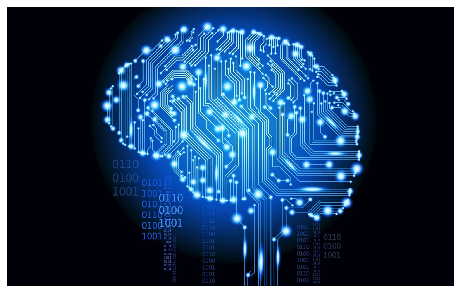

In [23]:
# Load an color image in grayscale
# cv2.IMREAD_COLOR：    加载彩色图像。 任何形象的透明度将被忽略
# cv2.IMREAD_GRAYSCALE：以灰度模式加载图像， 
# cv2.IMREAD_UNCHANGED：加载包含 alpha通道的图像(透明度)
# 以上可以分别输入1， 0， -1 代表三个标签

img_color = cv2.imread('imgs/pic2.jpg', 1)
plt_cv2read(img_color, gray = False)

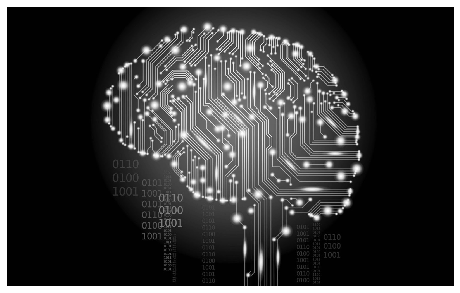

In [29]:
img_gray = cv2.imread('imgs/pic2.jpg', 0)
plt_cv2read(img_gray, gray = True)

In [4]:
img_color.shape

(1000, 1600, 3)

In [5]:
type(img_color)

numpy.ndarray

In [6]:
cv2.imread?

In [23]:
img1 = cv2.imread("imgs/pic2.jpg", 1)
img2 = cv2.imread("imgs/pic2.jpg", cv2.IMREAD_GRAYSCALE)

In [25]:
np.array_equal(img1, img2)

False

In [24]:
print img1.shape
print img2.shape

(1000, 1600, 3)
(1000, 1600)


- conclusion: 
              Color image has another dimension, i.e. RGB color -> 3 in (1000,1600,3) shape above; 
              
              Gray image does not have that, so only (1000,1600) shape above

In [27]:
# 显示彩色图像
img_color = cv2.imread('imgs/pic2.jpg', 1)
cv2.namedWindow("image",cv2.WINDOW_NORMAL)
cv2.imshow('image',img_color)
cv2.waitKey(0) # cv2.waitKey(n ms)
cv2.destroyAllWindows()

In [30]:
# 显示 灰色图片
cv2.namedWindow("image",cv2.WINDOW_NORMAL)
cv2.imshow('image',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()`

Using Open CV (cv2) to read image

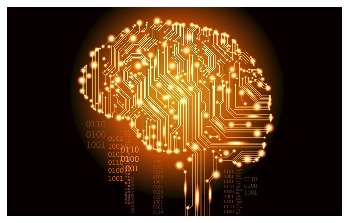

In [31]:
# 利用matplotlib 显示从opencv读出来的图片
img_color = cv2.imread('imgs/pic2.jpg', 1)
plt.figure()
plt.axis("off")
plt.imshow(img_color)
plt.show()

- #### picture above has color not the same as original picture, 这是因为openCV读取RGB图片，存入的三维numpy 数组的形式，但是顺序是反的！

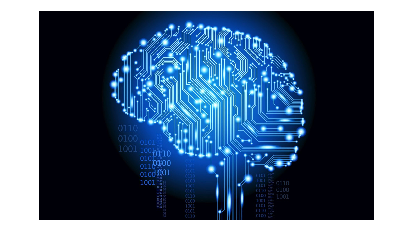

In [41]:
img_cvt = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis("off")
plt.imshow(img_cvt)
plt.show()

In [42]:
print img_cvt.shape
print img_color.shape

(1000, 1600, 3)
(1000, 1600, 3)


In [43]:
np.array_equal(img_cvt, img_color)

False

OR: you can also use matplotlib image function to read picture

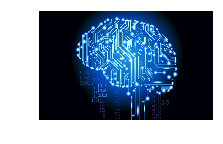

In [50]:
from matplotlib import image as mpimg
img_mp = mpimg.imread("imgs/pic2.jpg")
plt.figure(figsize = (4, 2))
plt.axis("off")
plt.imshow(img_mp)
plt.show()

In [51]:
# 三种方法读出来的三维numpy数组都是一样的大小

print img_mp.shape
print img_color.shape
print img_cvt.shape

(1000, 1600, 3)
(1000, 1600, 3)
(1000, 1600, 3)


In [32]:
# 同样的在保存的时候，cv2存的也是BGR的顺序，需要注意
#cv2.imwrite("imgs/img_cvt.png", img_cvt)
cv2.imwrite("imgs/img_cvt.png", img_color)

True

### cv2.waitKey 函数

- waitKey()函数的功能是不断刷新图像，频率时间为delay，单位为ms
- 返回值为当前键盘按键值
- 视频显示：delay>0时，延迟”delay”ms，在显示视频时这个函数是有用的，用于设置在显示完一帧图像后程序等待”delay”ms再显示下一帧视频；如果使用waitKey(0)则只会显示第一帧视频
- 显示图像时，需要在cv2.imshow() 后加上cvWaitKey(n): 
        - n!=0: 等待n ms，如果在此期间有按键按下，则立即结束并返回按下按键的ASCII码，否则after n ms, 返回-1;
        - n = 0:无限等待下去，直到有按键按下,则立即结束并返回按下按键的ASCII码；

In [54]:
# 检查键盘上waitKey function的函数

img = cv2.imread("imgs/pic2.jpg")
cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.imshow('img',img)
res = cv2.waitKey(0) & 0xFF  # 0xFF： 二进制中为"11111111", 只取八位比特数。否则当CAP开启时候返回值会不同
print (res)
cv2.destroyAllWindows()

108


In [61]:
## Block 2: 循环中，检查键盘的按值
### for example here: until we press q, (i.e. 113) loop was break, otherwise print the value corresponding to key we press and continue loop

img = cv2.imread("imgs/curry.jpeg", 1)
cv2.namedWindow("img", cv2.WINDOW_NORMAL)

while(1):
    cv2.imshow("img",img)
    k = cv2.waitKey(0) & 0xFF
    if k == 113:  # 按键为q，才停止
        print (k)
        break
    elif k == -1 & 0xFF: #this is for when n!=0, waitkey return -1 if no key is pressed after n ms
        continue
    else:
        print (k)
cv2.destroyAllWindows()

100
102
115
100
102
103
49
113


In [58]:
-1& 0xFF

255

In [54]:
bin(0xFF)

'0b11111111'

## 读取视频

要捕捉视频，需要创建一个VideoCapture对象。 它的参数可以是设备索引或视频文件的名称。 设备索引只是指定哪个摄像头的号码。 通常一个相机将被连接 之后，可以逐帧捕捉。 最后不要忘记释放捕获

- cv2.VideoCapture()
- cv2.VideoWriter()

-> Note: the following code did not work well in jupyter notebook seems I need to install some other packages (i.e. isOpened() always return False).

-> Suggestion: copy the code into a python script and save as .py, then run it.

-> Tested: VideoCapture.py still not working... Googled, maybe something wrong with cv2 package itself in conda environment, no solution so far...

In [3]:
cap = cv2.VideoCapture('../imgs/kmeans.mp4')

# #在播放每一帧时，使用cv2.waitKey()适当持续时间，一般可以设置25ms

# Check if camera opened successfully
if (cap.isOpened() == False):
    print("Error opening video stream or file")
# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.namedWindow("frame", cv2.WINDOW_NORMAL)
        cv2.imshow('frame', frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    # Break the loop
    else:
        break

    i += 1
# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Error opening video stream or file


## 绘图函数

画线cv2.line() , 圆形cv2.cicle() ,矩形 cv2.rectangle() , 椭圆cv2.ellipse() , 文本cv2.putText()

需要设置的参数：
- img 你想要绘制的图形的那副图像
- color 形状的颜色，以RGB为例，需要传入的元组，例（255,0,0）代表蓝色，对于灰度图只需传入灰度值
- thickness 线条的粗细，如果给一个闭合图形设置为-1，那么这个图形就会被填充，默认值为1
- linetype 线条的类型，8连接，抗锯齿等。默认是8连接。cv2.LINE_AA为抗锯齿

### 画线
需要告诉函数这条线的起点和终点

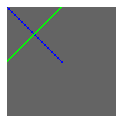

In [3]:
#Create a image
img = np.zeros((512,512,3), dtype = np.uint8)
# 黑色：RGB(0,0,0); 白色：RGB(255,255,255)

# 黑色背景色的
#img.fill(0)

# 灰色背景色的
img.fill(100)

#draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(260,260),(255,0,0),5)

#draw a diagonal green line with thickness of 5 px
cv2.line(img, (256,0),(0,256),(0,255,0),5)

plt.figure(figsize = (2,2))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 用opencv显示
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.resizeWindow('image',500,500)#定义frame的大小
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 画矩形
需要告诉函数左上角顶点和右下角顶点的坐标

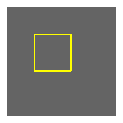

In [5]:
#Create a image
img = np.zeros((512,512,3), dtype = np.uint8)

# 黑色：RGB(0,0,0); 白色：RGB(255,255,255)

# 黑色背景色的
#img.fill(0)

# 灰色背景色的
img.fill(100)

# 黄色(0,255,255)的正方形 with thickness of 3 px; (128,128)/(300,300) is coordinates of two diagnals
cv2.rectangle(img,(128,128),(300,300),(0,255,255),3)

plt.figure(figsize = (2,2))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 在图片上添加文字
- 需要设置，文字内容，绘制的位置，字体类型、大小、颜色、粗细、类型等
- linetype 可以设置为 cv2.LINE_AA等

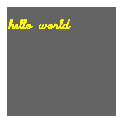

In [13]:
# 黑色背景色的
img = np.zeros((512,512,3), dtype = np.uint8)
#img.fill(0)

# 灰色背景色的
img.fill(100)

# putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX  
# {
#     FONT_HERSHEY_SIMPLEX = 0,
#     FONT_HERSHEY_PLAIN = 1,
#     FONT_HERSHEY_DUPLEX = 2,
#     FONT_HERSHEY_COMPLEX = 3,
#     FONT_HERSHEY_TRIPLEX = 4,
#     FONT_HERSHEY_COMPLEX_SMALL = 5,
#     FONT_HERSHEY_SCRIPT_SIMPLEX = 6,
#     FONT_HERSHEY_SCRIPT_COMPLEX = 7,
#     FONT_ITALIC = 16
# }
cv2.putText(img, "hello world",org=(10,100),fontFace = font, fontScale = 2,color = (0,255,255),thickness = 5,lineType = cv2.LINE_AA) 

plt.figure(figsize = (2,2))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## OpenCV图像的基本操作

### 1. 获取并修改像素值


In [16]:
img = cv2.imread('imgs/pic2.jpg')
print (img.shape)
print (img.dtype)
print (type(img))

(1000, 1600, 3)
uint8
<class 'numpy.ndarray'>


In [17]:
# 读取一副图像，根据像素的行和列的坐标获取它的像素值，对于RGB图像而言，返回RGB的值，对于灰度图则返回灰度值
px = img[100,20] #px shows the RGB of pixel [100,20] of the image
print(px)

[8 0 0]


In [19]:
# 返回蓝色通道的值，这里仍然需要注意OpenCV是BGR的顺序，所以Blue,Green,Red是index=0,1,2
blue = img[100,100,0]
print(blue)

red = img[100,100,2]
print (red)

#change RGB color of one selected pixel of a image
img[101,101]=[255,255,255]
print(img[101,101])

8
0
[255 255 255]


- numpy是经过优化了的进行快速矩阵运算的包，对于单个像素访问，Numpy数组方法array.item()和array.itemset()是更好的方法
- 但是 numpy 返回的是标量，如果需要RGB的值，需要逐个去access

In [20]:
pos = (100, 100, 2)
red = img.item(pos) #use img.item() to access img[100,100,2], return same as img[100,100,2]'s value
print (red)

img.itemset(pos,2) #use img.itemset() to change img[100,100,2]'s value, same as: img[100,100,2]=2 
print(img.item(pos))

0
2


### 2. 获取图像属性
图像属性包括：行，列，通道，图像数据类型，像素数目等  
<br>
2.1 img.shape可以获得图像的形状，返回值是一个包含行数，列数，通道数的元组  
2.2 img.size可以返回图像的像素数目  
2.3 img.dtype返回图像的数据类型,在debug时很重要，因为OpenCV-Python代码中经常出现数据类型的不一致

In [22]:
print (img.shape)
print (img.size)
print (img.dtype)

(1000, 1600, 3)
4800000
uint8


### 3.拆分及合并图像通道

In [52]:
def plt_cv2read(img, figsize = (4,6), gray = False):
    if figsize:
        plt.figure(figsize = figsize)
    plt.axis("off")
    if not gray:
#         print ('not gray color')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap = 'gray')
    plt.show()

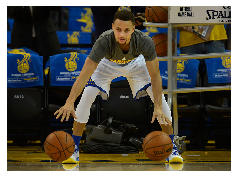

In [57]:
img = cv2.imread("imgs/curry.jpeg",1)
plt_cv2read(img)

(1106, 1500)
True
True


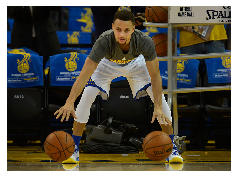

In [37]:
b, g, r = cv2.split(img) #拆分
print (b.shape)
print (b.shape == g.shape)
print (b.shape == r.shape)

img_merge = cv2.merge((b, g, r)) #合并 b,g,r channels to one image
plt_cv2read(img_merge)

#### 其实更好的方法是通过numpy array直接index， 可以更快速的选取
** img.split() 尽量少用 **

--> Here we run np index vs. cv2.split() 1000 times for each, and see what's the difference in run timing

In [38]:
%%time
for i in range(1000):
    b = img[:, :, 0]
    g = img[:, :, 1]
    r = img[:, :, 2]

Wall time: 997 µs


In [39]:
%%time
for i in range(1000):
    b, g, r = cv2.split(img) 

Wall time: 4.39 s


### 4. 为图像填充 （padding）
- 卷积神经网络(CNN)卷积运算（convolution）和池化层（pooling）常会用到
- 想为图像周围建一个边可以使用cv2.copyMakeBorder()函数
    - 5.1 src输入图像
    - 5.2 top,bottom,left,right对应边界的像素数目
    - 5.3 borderType要添加哪种类型的边界：
        - 5.3.1	cv2.BORDER_CONSTANT添加有颜色的常数值边界，还需要下一个参数（value）
        - 5.3.2	cv2.BORDER_REFLIECT边界元素的镜像。例如：fedcba | abcdefgh | hgfedcb
        - 5.3.3	cv2.BORDER_101或者cv2.BORDER_DEFAULT跟上面一样，但稍作改动，例如：gfedcb | abcdefgh | gfedcba  -> 左边以a为原点做镜像,右边以h为原点做镜像
        - 5.3.4	cv2.BORDER_REPLICATE复后一个元素。例如: aaaaaa| abcdefgh|hhhhhhh
        - 5.3.5	cv2.BORDER_WRAP 就像样: cdefgh| abcdefgh|abcdefg
        - 5.3.6	value边界颜色

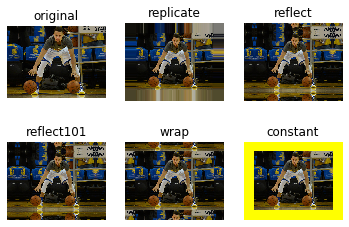

In [60]:
img = cv2.imread("imgs/curry.jpeg")
yellow = [0,255,255] 
constant = cv2.copyMakeBorder(img,200,200,200,200,cv2.BORDER_CONSTANT,value=yellow)
reflect = cv2.copyMakeBorder(img,200,200,200,200,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,200,200,200,200,cv2.BORDER_REFLECT101)
replicate = cv2.copyMakeBorder(img,200,200,200,200,cv2.BORDER_REPLICATE)
wrap = cv2.copyMakeBorder(img,200,200,200,200,cv2.BORDER_WRAP)


plt.subplot(231),plt.imshow(cvt(img),'gray'),plt.title('original'), plt.axis("off")
plt.subplot(232),plt.imshow(cvt(replicate),'gray'),plt.title('replicate'), plt.axis("off")
plt.subplot(233),plt.imshow(cvt(reflect),'gray'),plt.title('reflect'), plt.axis("off")
plt.subplot(234),plt.imshow(cvt(reflect101),'gray'),plt.title('reflect101'), plt.axis("off")
plt.subplot(235),plt.imshow(cvt(wrap),'gray'),plt.title('wrap'), plt.axis("off")
plt.subplot(236),plt.imshow(cvt(constant),'gray'),plt.title('constant'), plt.axis("off")

plt.show()

## OpenCV图像的运算

### 1. 图像加法

- 使用cv2.add()将两幅图像进行加法运算，也可以直接使用numpy，res=img1+img2.两幅图像的大小，类型必须一致，或者第二个图像可以是一个简单的标量值。
- openCV的加法是一种饱和操作，而numpy的加法是一种模操作

In [258]:
x=np.uint8([250])
y=np.uint8([10])
print(cv2.add(x,y)) # 250+10=260>=255
print (x+y) # 250+10=260%255=4

[[255]]
[4]


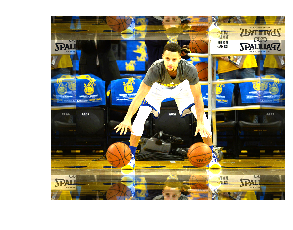

In [266]:
plt_cv2read(cv2.add(wrap,reflect101), (3, 4))

### 2.图像混合 (image blending)

- 这也是加法，不同的是两幅图像的权重不同，这会给人一种混合或者透明的感觉
- 图像混合的计算公式如下：
$ g(x) = (1 - \alpha )f_0(x)+\alpha f_1(x) $
通过修改 α 的值 $0<\alpha < 1$,可以实现不同的混合
- 函数cv2.addWeighed()可以按下面的公式对图片进行混合：
$$
dst = \alpha \bullet img1 + \beta \bullet img2 + \gamma
$$

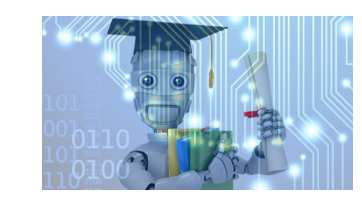

In [301]:
# 读取两个图片。对第二个图片剪裁成和第一个图片大小一样的格式
img1 = cv2.imread("imgs/ml.png")
img2 = cv2.imread("imgs/pic2.jpg")
img2_crop = img2[500:259 + 500, 500:460 + 500, :]

# 进行图像的混合
a = 0.6
dst = cv2.addWeighted(img1,a,img2_crop,1-a,0)

plt_cv2read(dst)

### 3. 按位置运算
- AND: cv2.bitwise_and
- OR: cv2.bitwise_or
- NOT: cv2.bitwise_not
- XOR: cv2.bitwise_xor

#### 这个像素会失去了它的蓝色和绿色部分，而保留红色元素
(137,100,80) & (255,0,0) = (137,0,0)

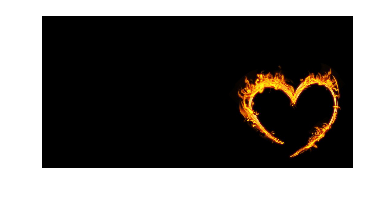

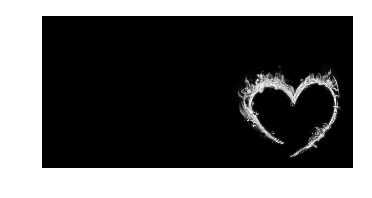

In [371]:
img1 = cv2.imread("imgs/curry.jpeg")
#plt_cv2read(img1)
img2 = cv2.imread("imgs/pic3.jpg")
plt_cv2read(img2)

# 选择放置新图片的区域，创建 ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt_cv2read(img2gray, gray = "True")

In [390]:
print img2gray.max()
print img2gray.min()

238
0


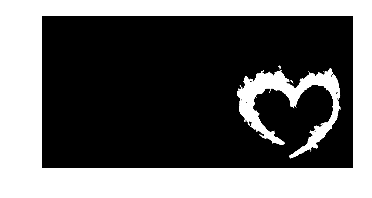

[  0 255]


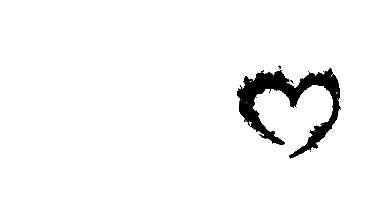

[  0 255]


In [402]:
# 创建一个mask，这里 cv2.threshold(src, thresh, maxval, type[, dst])
# 所有小于10的值都被处理成为0，变成黑色，而所有大于阈值的都被处理成为了255，为白色
ret, mask = cv2.threshold(src = img2gray, thresh = 10, maxval = 255, type = cv2.THRESH_BINARY)
plt_cv2read(mask, gray="True")
print np.unique(mask)

mask_inv = cv2.bitwise_not(mask)
plt_cv2read(mask_inv, gray="True")
print np.unique(mask_inv)

现在把图像1的logo的地方 black out


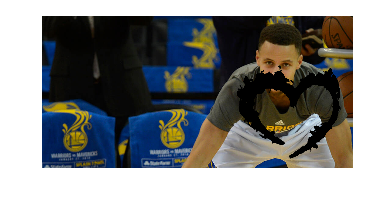

只取图像2中logo的地方


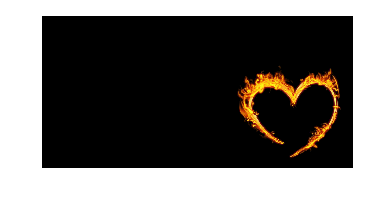

两个图像合并


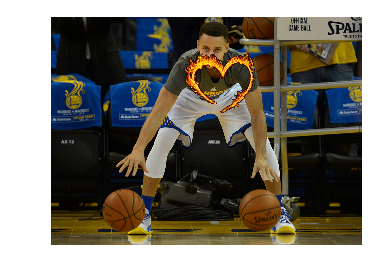

In [412]:
print "现在把图像1的logo的地方 black out"
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt_cv2read(img1_bg)

print "只取图像2中logo的地方"
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt_cv2read(img2_fg)

print "两个图像合并"
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols] = dst

plt_cv2read(img1)

## 图像处理： 颜色空间转换

### 1.转换颜色空间

- openCV 提供274种颜色变化，但是最常用的也就几种：

- 对于BGR ↔ Gray的转换，我们使用的ﬂag就是cv2.COLOR_BGR2GRAY。
- 同样对于BGR↔HSV的转换我们用的ﬂag就是cv2.COLOR_BGR2HSV
    * 在 OpenCV 的 HSV 格式中，H（Hue 色彩/色度）的取值范围是 [0，179]， S（Saturation，饱和度）的取值范围 [0，255]，V（ Value，亮度）的取值范围 [0，255]。但是不同的软件使用的值可能不同。所以当你拿 OpenCV 的 HSV 值与其他软件的 HSV 值对比时，一定要记得归一化
- BGR to RGB， cv2.COLOR_BGR2RGB

In [22]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print len(flags)

274


### 2.物体跟踪 (object tracking)

可以利用将一幅图像从 BGR 换到 HSV 一点来提取带有某个特定色的物体。在 HSV 颜色空间中要比在 BGR 空间中更容易表示一个特定颜色  
假如提取的是一个蓝色的物体：
* 从视频中获取每一帧图像
* 将图像换到 HSV 空间
* 设置 HSV 阀值到蓝色范围。
* 获取蓝色物体

In [23]:
img = cv2.imread("imgs/pic2.jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#设定蓝色的阀值
lower_blue = np.array([110,100,100])
upper_blue = np.array([130,255,255])
#根据阀值构建掩模
mask = cv2.inRange(hsv,lower_blue,upper_blue)
#对原图和掩模进行位运算
res = cv2.bitwise_and(img,img,mask=mask)
#显示图像
cv2.namedWindow("img",cv2.WINDOW_NORMAL),cv2.resizeWindow('img', 400,250)
cv2.imshow('img',img)
cv2.namedWindow("mask",cv2.WINDOW_NORMAL),cv2.resizeWindow('mask',400,250)
cv2.imshow('mask',mask)
cv2.namedWindow("res",cv2.WINDOW_NORMAL),cv2.resizeWindow('res',400,250)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 怎样找到要跟踪对象的HSV值
- 函数cv2.cvtColor()可以用到这里，现在需要传入的参数是RGB的值而不是一幅图
- 例如要找到绿色的HSV值:
- 然后取 [H-10, 100,100] 和 [H+10,255,255]作为下限和上限即可

In [24]:
green=np.uint8([[[255,0,0]]])
hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print hsv_green

[[[120 255 255]]]


#### video operation
- 参见py file

## 图像处理： 颜色空间转换

#### 1.简单阀值
cv2.threshold
当像素值高于阀值时，我们给这个像素赋予一个新值（可能是白色），否则我们给它赋予另外一种颜色（也许是黑色）。这个函数就是cv2.threshold()。这个函数的第一个参数就是原图像，原图像应该是灰度图。第二个参数就是用来对像素值进行分类的阀值，第三个参数就是当像素值高于（或者小于）阀值时，应该被赋予新的像素值。OpenCV提供了多种不同的阀值方法，这是有第四个参数来决定的。方法包括：

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

<img src = "imgs/cv_threshold.png">

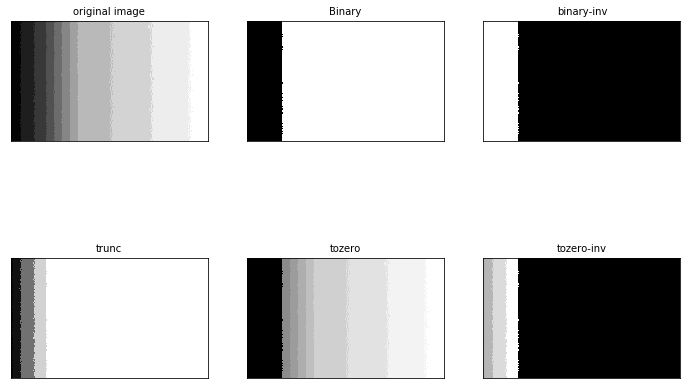

In [30]:
img = cv2.imread("imgs/gradient.png", 0)
#中值滤波
img = cv2.medianBlur(img,5)
ret , thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret , thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret , thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret , thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['original image','Binary','binary-inv','trunc','tozero','tozero-inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

plt.figure(figsize = (12, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i],fontsize=10)
    plt.xticks([]),plt.yticks([])

plt.show()

#### 2.自适应阀值
- 根据图像上的每一个小区域计算与其对应的阀值。因此在同一幅图像上的不同区域采用的是不同的阀值，从而使我们能在亮度不同的情况下得到更好的结果。
- 这种方法需要我们指定三个参数，返回值只有一个。
- Adaptive Method 指定计算阀值的方法
    - cv2.ADAPTIVE_THRESH_MEAN_C:阀值取自相邻区域的平均值
    - cv2.ADAPTIVE_THRESH_GAUSSIAN_C:阀值取自相邻区域的加权和，权重为一个高斯窗口
    - Block Size 邻域大小（用来计算阀值的区域大小）
    - C这就是一个常数，阀值就等于的平均值或者加权平均值减去这个常数

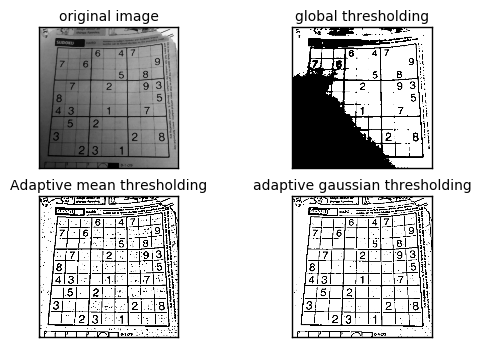

In [45]:
img = cv2.imread("imgs/threshold_adp.PNG", 0)
#中值滤波
img = cv2.medianBlur(img,5)

ret , th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
# 11为block size，2为C值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY,11,2)

titles = ['original image' , 'global thresholding','Adaptive mean thresholding',
          'adaptive gaussian thresholding']
images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=10)
    plt.xticks([]),plt.yticks([])

plt.show()

## 图像处理：几何变换

#### 1. 扩展缩放（scaling）
- 只是改变图像的尺寸大小，cv2.resize()可以实现这个功能
    - CV_INTER_NN - 最近邻插值,  
    - CV_INTER_LINEAR - 双线性插值 (缺省使用)  
    - CV_INTER_AREA - 使用象素关系重采样。在缩小图像时，推荐使用 
    - CV_INTER_CUBIC - 立方插值.
    - 默认情况下所有改变图像尺寸大小的操作使用的是插值法都是cv2.INTER_LINEAR
    - http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/

In [70]:
img = cv2.imread('imgs/ml.png')

height , width =img.shape[:2]
zoom = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_LINEAR)
shrink = cv2.resize(img, (width//2,height//2), interpolation = cv2.INTER_AREA)
print ("original image shape: " + str(img.shape))
print ("After zoom: image shape: " + str(zoom.shape))
print ("After shrinking: image shape: " + str(shrink.shape))

while(1):
    cv2.imshow('img',img)
    cv2.imshow('shrink',shrink)
    cv2.imshow("zoom", zoom)
    if cv2.waitKey(1)&0xFF == 27:
        break
cv2.destroyAllWindows()

original image shape: (259L, 460L, 3L)
After zoom: image shape: (518L, 920L, 3L)
After shrinking: image shape: (129L, 230L, 3L)


#### 2. 平移（translation）

- 利用仿射变换，构建矩阵 
$$
M\,\,=\,\,\left[ \begin{matrix}
	1&		0&		t_x\\
	0&		1&		t_y\\
\end{matrix} \right]  \\
\left[ \begin{array}{c}
	x_{new}\\
	y_{new}\\
	1\\
\end{array} \right] =\left[ \begin{matrix}
	1&		0&		t_x\\
	0&		1&		t_y\\
	0&		0&		1\\
\end{matrix} \right] \left[ \begin{array}{c}
	x\\
	y\\
	1\\
\end{array} \right] =\left[ \begin{array}{c}
	x+t_x\\
	y+t_y\\
	1\\
\end{array} \right] 
$$

- numpy 构建数组，然后用cv2.warpAffine()函数。


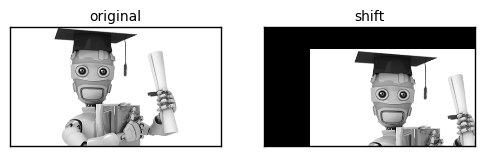

In [81]:
img = cv2.imread('imgs/ml.png',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
# 注意这里 warpAffine 第三个函数对应是（宽，高），宽 = 列数目，高 = 行数目
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img,'gray'),plt.title('original',fontsize = 10),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst,'gray'),plt.title('shift',fontsize = 10), plt.xticks([]),plt.yticks([])

plt.show()

#### 3. 旋转（rotation）

- 如果将一个图片旋转 $\theta $ 角，对应的旋转矩阵为：
$$
M\,\,=\,\,\left[ \begin{matrix}
	\cos \theta&		-\sin \theta\\
	\sin \theta&		\cos \theta\\
\end{matrix} \right] 
$$
<br>

- openCV提供了在任意可调节的中心做scalable的旋转操作，对应的矩阵函数为：
\begin{align}
& M\,\,=\,\,\left[ \begin{matrix}
	\alpha&		\beta&		\left( 1-\alpha \right) center_x\,\,-\beta center_y\\
	-\beta&		\alpha&		\beta center_x\,\,+\,\,\left( 1-\alpha \right) center_y\\
\end{matrix} \right] \\
& \alpha = scale \bullet \cos \theta \\
& \beta = scale \bullet \sin \theta 
\end{align}
<br>

- 只需要简答的用cv2.getRotationMaxtrix2D 就可以实现旋转操作


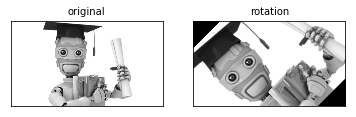

In [461]:
img = cv2.imread('imgs/ml.png',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D(center = (cols/2, rows/2), angle = 45, scale =  1.5)
# 注意这里 warpAffine 第三个函数对应是（宽，高），宽 = 列数目，高 = 行数目
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img,'gray'),plt.title('original',fontsize = 10),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst,'gray'),plt.title('rotation',fontsize = 10), plt.xticks([]),plt.yticks([])

plt.show()

#### 4. 视角变换 (perspective transformation)

- 需要一个3x3变换矩阵。在变换前后直线还是直线
- 在原图上找到4个点，以及他们在输出图上对应的位置，这四个点中任意三个都不能共线，可以有函数cv2.getPerspectiveTransform()构建，然后这个矩阵传给函数cv2.warpPerspective()

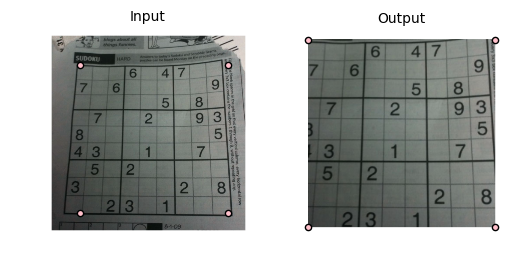

In [123]:
img=cv2.imread('imgs/threshold_adp.PNG')
rows,cols,ch = img.shape

pts1 = np.float32([[80,80],[510,80],[80,510],[510,510]])
x1, y1 = pts1.T
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])
x2, y2 = pts2.T

M = cv2.getPerspectiveTransform(src = pts1,dst = pts2)

dst = cv2.warpPerspective(src = img, M = M, dsize = (250,250))

plt.subplot(121),plt.imshow(img),plt.title('Input', fontsize = 10), plt.scatter(x1,y1, c= "pink"),plt.axis("off")
plt.subplot(122),plt.imshow(dst),plt.title('Output', fontsize = 10),plt.scatter(x2,y2, c= "pink"),plt.axis("off")
plt.show()

## 图像处理：图像平滑

http://blog.leanote.com/post/hidamari/opencv%E5%BC%80%E5%8F%91%E7%AC%94%E8%AE%B0%EF%BC%88%E4%BA%94%EF%BC%89%E2%80%94%E2%80%94%E5%9B%BE%E5%83%8F%E6%BB%A4%E6%B3%A2

#### 1. 2D 卷积（Convolution) 滤波 (Image Filtering)

- 即在尽量保留图像细节特征的条件下对目标图像的噪声进行抑制，是图像预处理中不可缺少的操作，其处理效果的好坏将直接响到后续图像处理和分析的有效性和可靠性。（滤波就是要去除没用的信息，保留有用的信息，可能是低频，也可能是高频）

- 使用Smooth/Blur 原理： 卷积计算 
$$ 
g(i,j)= \sum_{k,l}{f(i+k, j+l)h(k,l)}\\
g(i,j): 输出 \\
f(i,j): 输入 \\
h(k,l): 卷积核
$$

<img src="imgs/cnn.gif" height="500" width="500">

- 可以对2D图像实施低通滤波（LPF）和高通滤波（HPF）。LPF用于去除噪音，模糊图像，HPF用于找到图像的边缘

- 构造一个4x4的平均滤波器的核做2D卷积：

$$
kernel\,\,=\,\,\left[ \begin{matrix}
	1&		1&		1&		1\\
	1&		1&		1&		1\\
	1&		1&		1&		1\\
	1&		1&		1&		1\\
\end{matrix} \right] 
$$


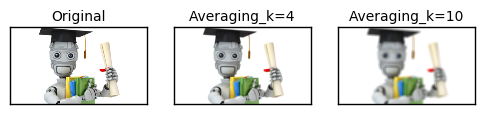

In [136]:
img = cv2.imread('imgs/ml.png')
plt.subplot(131),plt.imshow(cvt(img)),plt.title('Original', fontsize = 10)
plt.xticks([]), plt.yticks([])

h, w = 4, 4
kernel = np.ones((h,w),np.float32)/(h * w)
dst = cv2.filter2D(src = img,ddepth = -1, kernel = kernel)
plt.subplot(132),plt.imshow(cvt(dst)),plt.title('Averaging_k=4', fontsize = 10)
plt.xticks([]), plt.yticks([])

h, w = 10, 10
kernel = np.ones((h,w),np.float32)/(h * w)
dst = cv2.filter2D(src = img,ddepth = -1, kernel = kernel)
plt.subplot(133),plt.imshow(cvt(dst)),plt.title('Averaging_k=10', fontsize = 10)
plt.xticks([]), plt.yticks([])

plt.show()

#### 平均滤波

- 上述即平均滤波的卷积运算，也可以通过cv2.blur来实现

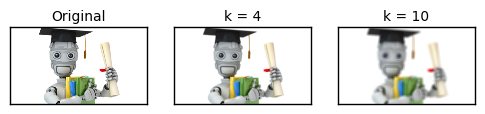

In [141]:
img = cv2.imread('imgs/ml.png')
plt.subplot(131),plt.imshow(cvt(img)),plt.title('Original', fontsize = 10)
plt.xticks([]), plt.yticks([])

blur = cv2.blur(img, (4,4))
plt.subplot(132),plt.imshow(cvt(blur)),plt.title('k = 4', fontsize = 10)
plt.xticks([]), plt.yticks([])

blur = cv2.blur(img, (10,10))
plt.subplot(133),plt.imshow(cvt(blur)),plt.title('k = 10', fontsize = 10)
plt.xticks([]), plt.yticks([])

plt.show()

#### 高斯滤波（gaussian filtering/blur）

- 斯滤波采取邻域内越靠近的值提供越大的权重的方式计算平均值
- 现在把卷积核换成高斯核，简单的说方框不变，将原来每个方框的值是相等的，现在里面的值是符合高斯分布的，方框中心的值最大，其余方框根据距离中心元素的距离递减，构成一个高斯小山包，原来的求平均数变成求加权平均数，权就是方框里的值。
- 高斯卷积核：
$$
G(u, v) = \frac{1}{2\pi \sigma ^2}e^{-(u^2+v^2)/2\sigma ^2}
$$
<br>

- 实现的函数是cv2.GaussianBlur()。需要指定高斯核的宽和高（必须是奇数），以及高斯函数沿X,Y方向的标准差。如果我们只指定了X方向的标准差，Y方向也会取相同值，如果两个标准差都是0.那么函数会根据核函数的大小自己计算，高斯滤波可以有效的从图像中去除高斯噪音

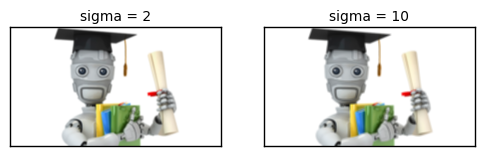

In [152]:
#GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
img = cv2.imread('imgs/ml.png')

blur = cv2.GaussianBlur(src = img, ksize = (5,5), sigmaX = 2)
plt.subplot(121),plt.imshow(cvt(blur)),plt.title('sigma = 2', fontsize = 10)
plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(src = img, ksize = (5,5), sigmaX = 10)
plt.subplot(122),plt.imshow(cvt(blur)),plt.title('sigma = 10', fontsize = 10)
plt.xticks([]), plt.yticks([])

plt.show()

#### 中值滤波

- 中值滤波是一种非线性滤波器。它是取邻域内各点的统计中值作为输出。这种滤波器可以有效的去除椒盐噪声。还能保持图像中各物体的边界不被模糊掉
- 一种最常用的非线性滤波器。这种滤波器只能使用正方形的邻域

<img src = "imgs/med3x3.gif">

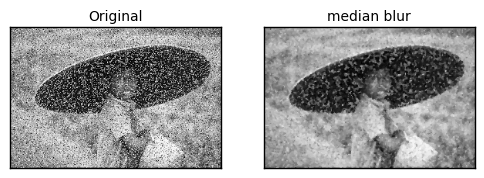

In [162]:
img = cv2.imread('imgs/medblur_demo.jpg')
plt.subplot(121),plt.imshow(cvt(img)),plt.title('Original', fontsize = 10)
plt.xticks([]), plt.yticks([])

blur = cv2.medianBlur(img, 3)
plt.subplot(122),plt.imshow(cvt(blur)),plt.title('median blur', fontsize = 10)
plt.xticks([]), plt.yticks([])

plt.show()

#### 双边滤波（bilateral filtering）

- 在高斯模糊的基础上加了一个值域限制, 两个像素的像素值相差太大就不进行模糊
- 双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函数确保只有邻近区的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相近的才会被用来做模糊运算。所以能保证边界不会被模糊
- 双边滤波器除了使用像素之间几何上的靠近程度之外，还多考虑了像素之间的光度/色彩差异， 使得双边滤波器能够有效的将影像上的噪声去除，同时保存影像上的边缘资讯

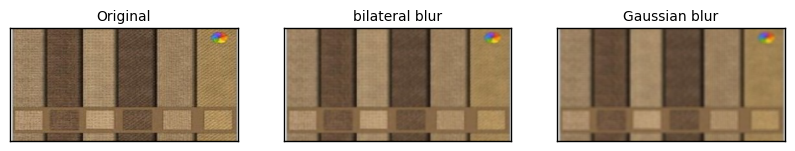

In [181]:
#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
# d: 邻域直径，
# sigmaSpace: 空间高斯函数标准差
# sigmaColor: 灰度值相似性高斯函数标准差 
img = cv2.imread('imgs/bilateral.jpg')
plt.figure(figsize = (10,8))
plt.subplot(131),plt.imshow(cvt(img)),plt.title('Original', fontsize = 10)
plt.xticks([]), plt.yticks([])

blur = cv2.bilateralFilter(img, 5, 150, 150)
plt.subplot(132),plt.imshow(cvt(blur)),plt.title('bilateral blur', fontsize = 10)
plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img,(5,5), 150)
plt.subplot(133),plt.imshow(cvt(blur)),plt.title('Gaussian blur', fontsize = 10)
plt.xticks([]), plt.yticks([])

plt.show()

## 图像处理： 形态学变换

- 形态学转换原理：一般情况下对二值化图像进行操作。需要两个参数，一个是原始图像，第二个被称为结构化元素或者核，它是用来决定操作的性质的。
- 基本操作为腐蚀和膨胀
- 作用：
    * 消除噪声
    * 分割(isolate)出独立的图像元素，在图像中连接(join)相邻的元素。
    * 寻找图像中的明显的极大值区域或极小值区域
    * 求出图像的梯度
- 二值化图像：黑白图（只有0和255两个值:


[  0 245]


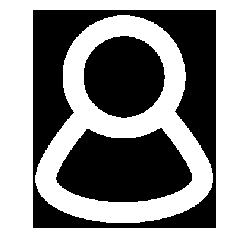

In [91]:
img = cv2.imread("imgs/binary.png", 0)
# 展示img这个numpy数组的unique值，是个binary数组
print np.unique(img.ravel())
plt_cv2read(img, figsize = (6,4), gray = True)

### 1. 腐蚀（erosion）
- 把前景物体的边界腐蚀掉，但是前景仍然是白色的。卷积核沿着图像滑动，如果与卷积核对应的原图像的所有像素值都是1，那么中心元素就保持原来的像素值，否则就变为零。根据卷积核的大小靠近前景的所有像素都会被腐蚀掉（变为0），所以前景物体会变小，整幅图像的白色区域会减少。这对于去除白噪音很有用，也可以用来断开两个连在一块的物体

- 进行腐蚀操作时，将内核 B 划过图像,将内核 B 覆盖区域的最小相素值提取，并代替锚点位置的相素



kernel matrix is : 
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


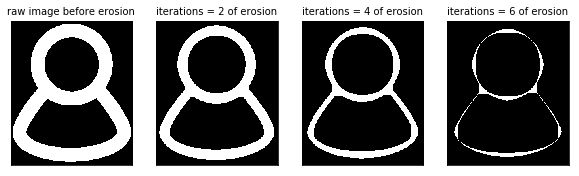

In [231]:
kernel = np.ones((5,5),np.uint8)
print "kernel matrix is : " 
print kernel
plt.figure(figsize = (10, 8))

# 展示原始图像
plt.subplot(1,4,1)
plt.title("raw image before erosion", fontsize = 10)
plt.imshow(img, cmap = "gray")
plt.xticks([]), plt.yticks([])

# 展示被腐蚀处理之后的图像
for i in range(1,4):
    iterations = i * 2
    erosion = cv2.erode(img, kernel, iterations = iterations)
    plt.subplot(1,4, i + 1)
    plt.imshow(erosion, cmap = 'gray')
    plt.title("iterations = %s of erosion"%iterations, fontsize = 10)
    plt.xticks([]), plt.yticks([])
    
plt.show()

kernel matrix is: 
[[1 1]
 [1 1]]
img matrix is: 
[[1 1 0 1]
 [1 0 0 1]
 [1 1 0 1]
 [1 1 0 1]]
after first iteration of erosion is: 
[[1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 1 0 0]]
after second iteration of erosion is: 
[[1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


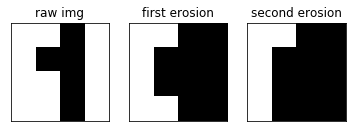

In [226]:
k = np.ones((2,2), dtype = np.int16)
print ("kernel matrix is: ")
print a

b = np.array([[1,1,0,1],[1,0,0,1],[1,1,0,1],[1,1,0,1]], np.int16)
print ("img matrix is: ")
print b
plt.subplot(131)
plt.imshow(b, cmap = "gray"),plt.xticks([]),plt.yticks([]),plt.title("raw img")

b_erode = cv2.erode(b, kernel = a, iterations = 1)
print ("after first iteration of erosion is: ")
print b_erode
plt.subplot(132)
plt.imshow(b_erode, cmap = "gray"),plt.xticks([]),plt.yticks([]),plt.title("first erosion")

b_erode2 = cv2.erode(b, kernel = a, iterations = 2)
print ("after second iteration of erosion is: ")
print b_erode2
plt.subplot(133)
plt.imshow(b_erode2, cmap = "gray"),plt.xticks([]),plt.yticks([]),plt.title("second erosion")

plt.show()

### 2. 膨胀

- 进行膨胀操作时，将内核 kernel 划过图像,将内核 kernel 覆盖区域的最大相素值提取，并代替锚点位置的相素。显然，这一最大化操作将会导致图像中的亮区开始”扩展” (因此有了术语膨胀 dilation )

kernel matrix is : 
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


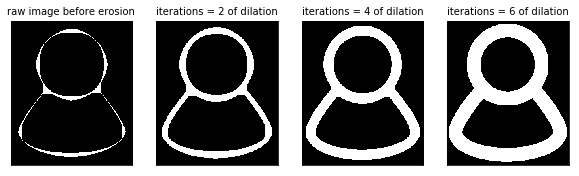

In [232]:
# 让我们进行反向操作，首先对原图作6次的腐蚀操作

img_before_dilation = cv2.erode(img, kernel, iterations = iterations)

kernel = np.ones((5,5),np.uint8)
print "kernel matrix is : " 
print kernel
plt.figure(figsize = (10, 8))

# 展示未膨胀操作前的图像
plt.subplot(1,4,1)
plt.title("raw image before erosion", fontsize = 10)
plt.imshow(img_before_dilation, cmap = "gray")
plt.xticks([]), plt.yticks([])

# 展示被腐蚀处理之后的图像
for i in range(1,4):
    iterations = i * 2
    dilation = cv2.dilate(img_before_dilation, kernel, iterations = iterations)
    plt.subplot(1,4, i + 1)
    plt.imshow(dilation, cmap = 'gray')
    plt.title("iterations = %s of dilation"%iterations, fontsize = 10)
    plt.xticks([]), plt.yticks([])
    
plt.show()

### 3. 开运算和闭运算

- 开运算是通过先对图像腐蚀再膨胀
$$ dst = open(src, element) = dilate(erode(src,element)) $$
    * 能够排除小团块物体(假设物体较背景明亮)  
    
    <img src = "imgs/opening.png">
    

- 闭运算是通过先对图像膨胀再腐蚀, 开运算的相反过程
$$ dst = close(src, element) = erode(dilate(src,element)) $$
    * 能够排除小型黑洞(黑色区域)
    
    <img src = "imgs/closing.png">


## 图像处理： 图像梯度（gradeint）

- OpenCV提供了三种不同的梯度滤波器（或者说高通滤波器）：Sobel，Scharr和Laplacian
    * Sobel和Scharr是求一阶或二阶导数。Scharr是对Sobel（使用小的卷积核求解梯度角度时）的优化
    * Laplacian是求二阶导数
    
### 1. Sobel算子

- 索贝尔算子是图像处理中的算子之一，主要用作边缘检测。在技术上，它是一离散性差分算子，用来运算图像亮度函数的梯度之近似值。在图像的任何一点使用此算子，将会产生对应的梯度矢量或是其法矢量

    -该算子包含两组3x3的矩阵，分别为横向及纵向，将之与图像作平面卷积，即可分别得出横向及纵向的亮度差分近似值。如果以 $ \mathbf {A}$ 代表原始图像， $\mathbf{G_x}$ 和 $\mathbf{G_y}$ 分别代表经横向及纵向边缘检测的图像，其公式如下

$$
\mathbf{G_x} = \left[ \begin{matrix}
-1 &0 &1\\
-2 &0 &2\\
-1 &0 &1\\
\end{matrix} \right] \ \ \ \mathbf{G_y} = \left[ \begin{matrix}
-1 &-2 &-1\\
0 &0 &0\\
1 &2 &1\\
\end{matrix} \right] \\
\mathbf{G} = \sqrt {\mathbf{G_x^2} + \mathbf{G_y^2}}\\
\mathbf{\Theta} = \arctan {\frac {\mathbf{G_y}} {\mathbf{G_x}}}
$$

### 2. Scharr 算子

- 当内核大小为3时，Scharr算子会使得梯度计算结果更为精确
- 3x3的Scharr滤波器卷积核如下：
$$
\mathbf{G_x} = \left[ \begin{matrix}
    -3 &0 &3\\
    -10 &0 &10\\
    -3 &0 &3\\
\end{matrix} \right] \ \ \ \mathbf{G_y} = \left[ \begin{matrix}
    -3 &-10 &-3\\
    0 &0 &0\\
    3 &10 &3\\
\end{matrix} \right] \\
$$


### 3. Laplacian 算子 （拉普拉斯）

- 拉普拉斯算子可以使用二阶导数的形式定义

$$
\text{Laplacian(src)} = \nabla^2{\text{(src)}} = \frac {\partial ^2 \text{(src)}}{\partial x^2} + \frac {\partial ^2 \text{(src)}}{\partial y^2}
$$

- 当ksize 为1时，采用的Laplacian 算子的核函数矩阵为：
$$
\mathbf{L} = \left[ \begin{matrix}
    0 &1 &0\\
    1 &-4 &1\\
    0 &1 &0\\
\end{matrix} \right] \\
$$


原图像数据的深度 ddepth is：uint8


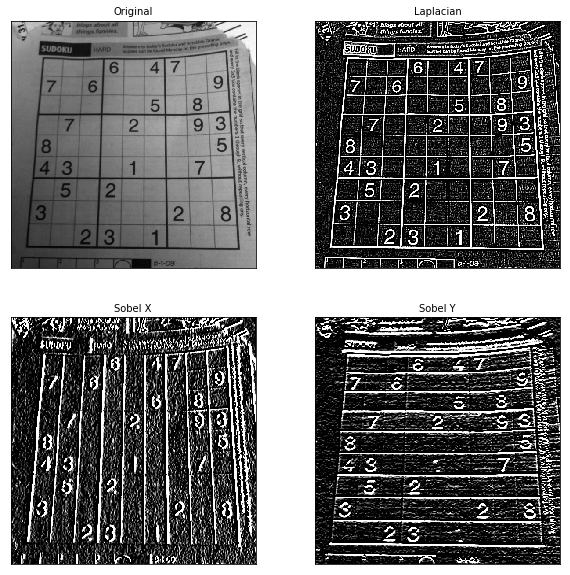

In [307]:
# 代码展示sobel算子和Laplacian算子对边缘检测和图像锐化的操作

plt.figure(figsize = (10, 10))
img = cv2.imread('imgs/threshold_adp.PNG',0)
dtype = img.dtype
print "原图像数据的深度 ddepth is：{}".format(dtype)

# 首先我们采用原图像精度： ddepth = -1 即 ddepth = cv2.CV_U8
laplacian = cv2.Laplacian(src = img, ddepth = -1, ksize = 5)
sobelx = cv2.Sobel(src = img, ddepth = -1, dx = 1, dy = 0, ksize = 5)
sobely = cv2.Sobel(src = img, ddepth = -1, dx = 0, dy = 1, ksize = 5)

# 对比我们采用更高小数位数的图像精度， 设置 ddepth = cv2.CV_64F
# laplacian = cv2.Laplacian(src = img, ddepth = cv2.CV_64F, ksize = 5)
# sobelx = cv2.Sobel(src = img, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
# sobely = cv2.Sobel(src = img, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original', fontsize = 10), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian', fontsize = 10), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X', fontsize = 10), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y', fontsize = 10), plt.xticks([]), plt.yticks([])

plt.show()

由图可以看出，将原始图像通过拉普拉斯变换后增强了图像中灰度突变处的对比度，使图像中小的细节部分得到增强并保留了图像的背景色调，使图像的细节比原始图像更加清晰。基于拉普拉斯变换的图像增强已成为图像锐化处理的基本工具。

## 图像处理： 傅立叶变换（Fourier transform）

- 对一张图像使用傅立叶变换就是将它分解成正弦和余弦两部分。也就是将图像从空间域(spatial domain)转换到频域(frequency domain)
- 傅立叶变换：任一函数都可以表示成无数个正弦和余弦函数的和的形式。傅立叶变换就是一个用来将函数分解的工具。 
- 对于周期函数的离散傅立叶级数为：
$$
f(x) = \sum_{n=-\infty}^{\infty}{F_n e^{inx}}
$$

- 2维图像的傅立叶变换可以用以下数学公式表达:
$$
F(k,l) = \sum_{i=0}^{N-1}{\sum_{j=0}^{N-1}{f(i,j)e^{-i2\pi(k_i + k_j)/N}}}\\
e^{ix}=\cos x + i\sin x
$$
  
  
    其中 f 是空间域(spatial domain)值， F 则是频域(frequency domain)值。因此，显示傅立叶变换之后的结果需要使用实数图像(real image) 加虚数图像(complex image), 或者幅度图像(magitude image)加相位图像(phase image)。
    幅度谱决定了一幅图像中含有的各种频率分量的多少 
    相位谱决定了每一种频率分量在图像中的位置 

- 在实际的图像处理过程中，仅仅使用了幅度图像，因为幅度图像包含了原图像的几乎所有我们需要的几何信息。 然而，如果你想通过修改幅度图像或者相位图像的方法来间接修改原空间图像，你需要使用逆傅立叶变换得到修改后的空间图像，这样你就必须同时保留幅度图像和相位图像了

In [424]:
def get_mgn_fft(img):
    rows, cols = img.shape[:2]
    
    # 通常如果数组大小是2的指数，或者是2’s, 3’s, and 5’s的乘积时候，傅立叶变换计算效率会更高
    # 通过cv2.getOptimalDFTSize来取得最优数组大小，然后进行padding
    nrows, ncols = cv2.getOptimalDFTSize(rows),cv2.getOptimalDFTSize(cols)
    frame = cv2.copyMakeBorder(img, 0, ncols - cols, 0, nrows - rows, cv2.BORDER_CONSTANT, value = 0)
    
    # 通过np的fft.fft2进行2维度的fft， 并将图像原移动到中心点
    img_dft = np.fft.fft2(frame)
    img_dft = np.fft.fftshift(img_dft)
    
    # 对数尺度(logarithmic scale)缩放. 傅立叶变换的幅度值范围大到不适合在屏幕上显示。
    # 高值在屏幕上显示为白点，而低值为黑点，高低值的变化无法有效分辨。
    # 为了在屏幕上凸显出高低变化的连续性，我们可以用对数尺度来替换线性尺度
    mgn = np.log(np.abs(img_dft)+1)
    
    return mgn

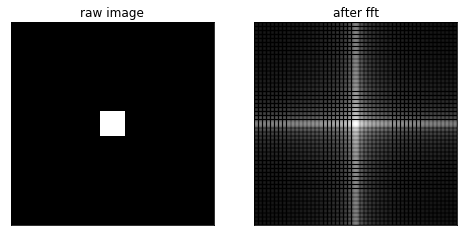

In [445]:
plt.figure(figsize = (8,4))

# 一个以黑色为背景的大小为400 x 400 px 的图像
img = np.zeros((400, 400)) 

# 定义白色区域的中心
center = [200, 200]

# 定义白色区域的宽度和高度
w, h = 50, 50 

img[center[0] - w/2:center[0] + w/2, center[1] - h/2:center[1] + h/2] = 1

plt.subplot(121),plt.imshow(img, cmap = 'gray'), 
plt.title("raw image"),plt.xticks([]), plt.yticks([])

mgn = get_mgn_fft(img)
plt.subplot(122), plt.imshow(mgn, cmap = 'gray')
plt.title("after fft"),plt.xticks([]), plt.yticks([])

plt.show()

### 平移对傅立叶变换的影响

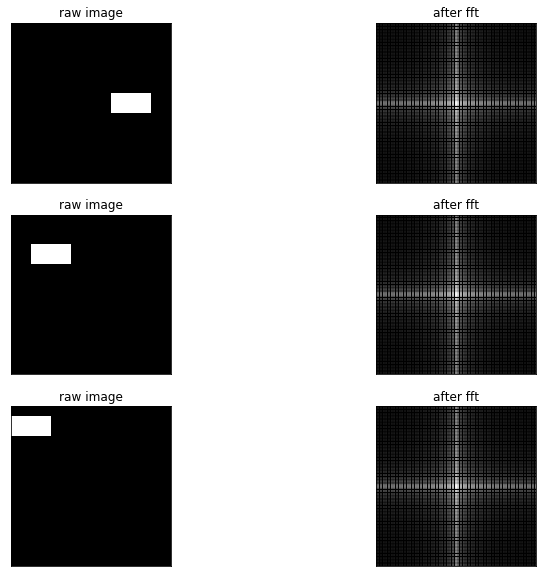

In [460]:
# 一个以黑色为背景的大小为400 x 400 px 的图像
raw_img = np.zeros((400, 400)) 

# 定义白色区域的中心
centers = [[200, 300],[100,100],[50,50]]
nc = len(centers)
# 定义白色区域的宽度和高度
w, h = 50, 100 

plt.figure(figsize = (12, 10))
for (i, center) in enumerate(centers):
    img = raw_img.copy()
    img[center[0] - w/2:center[0] + w/2, center[1] - h/2:center[1] + h/2] = 1
    plt.subplot(nc, 2, 2 * i + 1),plt.imshow(img, cmap = 'gray'), 
    plt.title("raw image"),plt.xticks([]), plt.yticks([])
    mgn = get_mgn_fft(img)
    plt.subplot(nc, 2, 2 * i + 2), plt.imshow(mgn, cmap = 'gray')
    plt.title("after fft"),plt.xticks([]), plt.yticks([])
plt.show()

### 旋转对傅立叶变换的影响

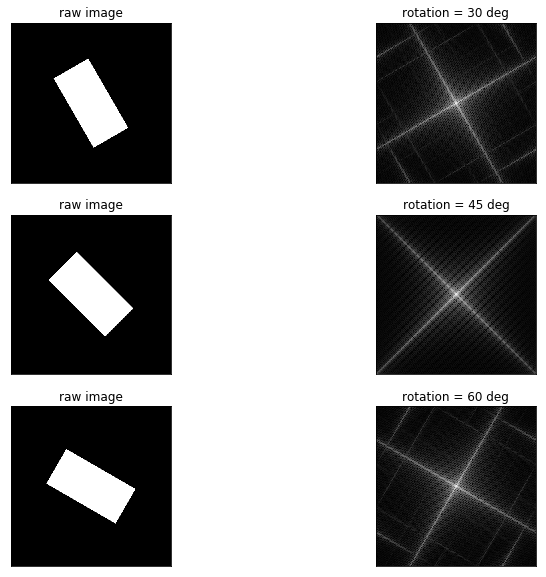

In [478]:
# 一个以黑色为背景的大小为400 x 400 px 的图像
raw_img = np.zeros((400, 400)) 

# 定义白色区域的中心以及旋转角度
center = [200, 200]
angles = [30, 45, 60]
nc = len(centers)

# 定义白色区域的宽度和高度
w, h = 200, 100 

plt.figure(figsize = (12, 10))
for (i, angle) in enumerate(angles):
    img = raw_img.copy()
    img[center[0] - w/2:center[0] + w/2, center[1] - h/2:center[1] + h/2] = 1
    M = cv2.getRotationMatrix2D(center = (center[0], center[1]), angle = angle, scale = 1)
    img = cv2.warpAffine(img,M,(cols,rows))
    plt.subplot(nc, 2, 2 * i + 1),plt.imshow(img, cmap = 'gray'), 
    plt.title("raw image"),plt.xticks([]), plt.yticks([])
    mgn = get_mgn_fft(img)
    plt.subplot(nc, 2, 2 * i + 2), plt.imshow(mgn, cmap = 'gray')
    plt.title("rotation = %d deg"%angle),plt.xticks([]), plt.yticks([])
plt.show()